# k-Fold

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)
# here distribution of samples in x-train and x-test is not uniform

In [75]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9592592592592593

In [77]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.48518518518518516

In [79]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9685185185185186

***KFold cross validation***

In [82]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [84]:
## example
#supplying a random dataset
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [86]:
help(kf)

Help on KFold in module sklearn.model_selection._split object:

class KFold(_BaseKFold)
 |  KFold(n_splits=5, *, shuffle=False, random_state=None)
 |  
 |  K-Folds cross-validator
 |  
 |  Provides train/test indices to split data in train/test sets. Split
 |  dataset into k consecutive folds (without shuffling by default).
 |  
 |  Each fold is then used once as a validation while the k - 1 remaining
 |  folds form the training set.
 |  
 |  Read more in the :ref:`User Guide <k_fold>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=5
 |      Number of folds. Must be at least 2.
 |  
 |      .. versionchanged:: 0.22
 |          ``n_splits`` default value changed from 3 to 5.
 |  
 |  shuffle : bool, default=False
 |      Whether to shuffle the data before splitting into batches.
 |      Note that the samples within each split will not be shuffled.
 |  
 |  random_state : int, RandomState instance or None, default=None
 |      When `shuffle` is True, `random_state` affec

In [88]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [90]:
get_score(LogisticRegression(), X_train, X_test, y_train, y_test)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9685185185185186

In [121]:
from sklearn.model_selection import StratifiedKFold ###for more uniform use StratifiedKFold
folds = StratifiedKFold(n_splits=3)


In [123]:
###################
scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    print(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    print(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    print(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))##for each iterations of model........./here after each 3 a diff model

    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))
##################    

0.8948247078464107
0.3806343906510851
0.9332220367278798
0.9532554257095158
0.41068447412353926
0.9482470784641068
0.9098497495826378
0.5125208681135225
0.9332220367278798


In [124]:
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [125]:
scores_svm

[0.3806343906510851, 0.41068447412353926, 0.5125208681135225]

In [126]:
scores_rf

[0.9382303839732888, 0.9298831385642737, 0.9315525876460768]

***eto boro code nh likke***

***can use this small code***

***cross_val_score function***

In [148]:
#############
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)
## 1st argument is classifier,2nd argument is X and £rd is y
#####################

array([0.89482471, 0.95325543, 0.90984975])

In [150]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)

array([0.38063439, 0.41068447, 0.51252087])

***cross_val_score uses stratifield kfold by default***

In [152]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)

array([0.92988314, 0.94323873, 0.92153589])

# instead of comparing between diferent classsifier
# we can compare the same classifier with different parameter
# it is called para-meter tunning

In [155]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

0.8736778398510243

In [157]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

0.9399068901303537

In [159]:
scores3=cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)
np.average(scores3)

0.9437952142459655

***Exercise***

In [165]:
'''
Use iris flower dataset from sklearn library and use cross_val_score against following models to measure the performance of each. 
In the end figure out the model with best performance,

Logistic Regression
SVM
Decision Tree
Random Forest
'''

'\nUse iris flower dataset from sklearn library and use cross_val_score against following models to measure the performance of each. In the end figure out the model with best performance,\n\nLogistic Regression\nSVM\nDecision Tree\nRandom Forest\n'

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

In [235]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), iris.data, iris.target,cv=5)

array([1.        , 0.96666667, 0.93333333, 0.9       , 1.        ])

In [237]:
scores2=cross_val_score(SVC(), iris.data, iris.target,cv=3)
np.average(scores2)

0.96

In [239]:
d_scores = cross_val_score(DecisionTreeClassifier(), iris.data, iris.target)
d_scores

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

In [241]:
np.average(d_scores)

0.9666666666666668

In [243]:
r_scores = cross_val_score(RandomForestClassifier(n_estimators=40), iris.data, iris.target,cv=7)
r_scores

array([0.95454545, 1.        , 0.90909091, 0.95238095, 0.85714286,
       0.95238095, 1.        ])

In [245]:
np.average(r_scores)

0.9465058750773035

# K Means Clustering Algorithm

In [40]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [42]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


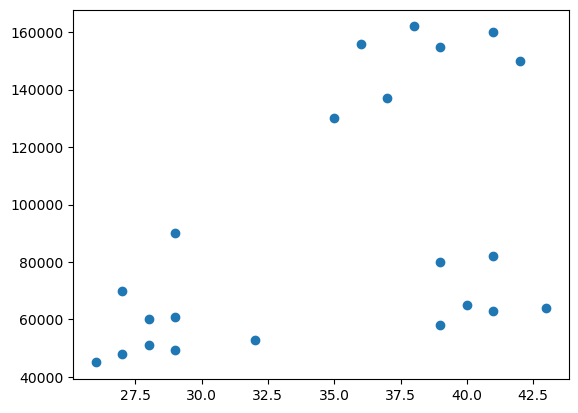

In [44]:
plt.scatter(df['Age'],df['Income($)'])

In [46]:
km = KMeans(n_clusters=3)###seeing from the plot

km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [48]:
help(km)

Help on KMeans in module sklearn.cluster._kmeans object:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centroids using sampling based on
 |      an empirical probability distribution of the points' contribution to the
 |      overall inertia. This technique speeds up convergence. The algorithm
 |      implemented is "greedy k-means++". It differs from the vanilla k-means++
 |      by making several 

In [50]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted
###numbering which cluster it belongs to......

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [51]:
### creating new columns
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


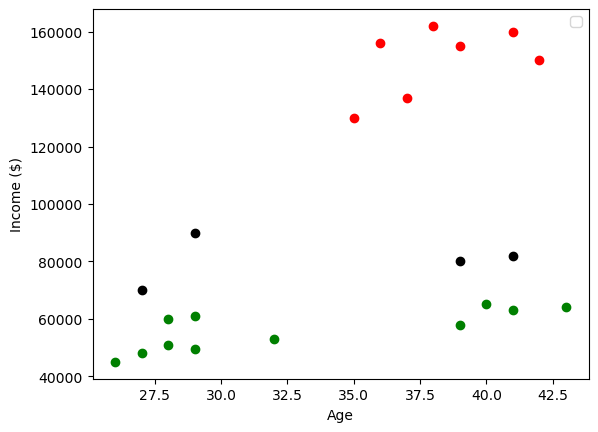

In [54]:
### now creating 3 different row from 3 different column
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [56]:
### not correct as compare to y axis difference x axis is very narrow

In [58]:
###so we have to scale it using min-max scaler

In [60]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
##income is scle from ) to 1
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [62]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [64]:
##after scale
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [69]:
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [73]:
km.cluster_centers_##(x,y)

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

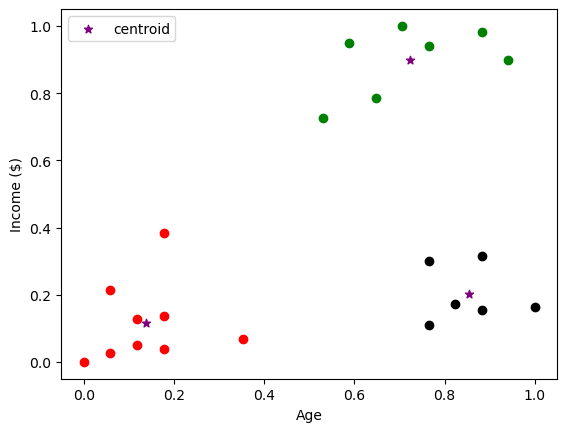

In [75]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
###[:,0]==[all row,1st column];;;[:,1]==[all row,2nd column]
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

***when have multiple feature and not possible to determine from scatter plot we use***

# Elbow Plot

In [83]:

k_rng = range(1,10)##1 to 9
sse = []###sum of square error
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

In [85]:
import os
import warnings
from sklearn.cluster import KMeans

# Suppress warnings for clean output
warnings.filterwarnings("ignore")

# Set the environment variable to avoid the memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

k_rng = range(1, 10)  # 1 to 9
sse = []  # Sum of square error

for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10)  # Explicitly set n_init to suppress FutureWarning
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [87]:
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.26640301246684156,
 0.22020960864009398,
 0.1685851223602976,
 0.13265419827245162,
 0.10497488680620909]

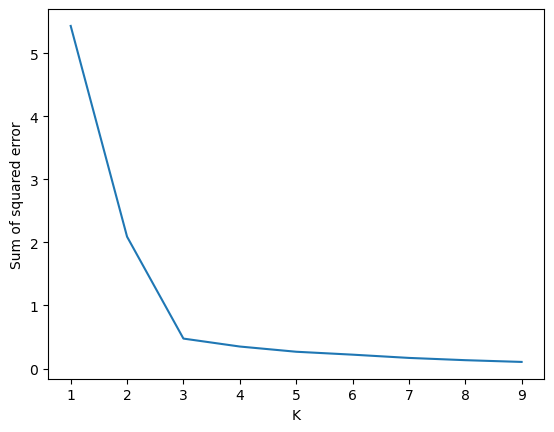

In [89]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# Exercise

In [2]:
'''
Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
Figure out if any preprocessing such as scaling would help here
Draw elbow plot and from that figure out optimal value of k
'''

'\nUse iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.\nFigure out if any preprocessing such as scaling would help here\nDraw elbow plot and from that figure out optimal value of k\n'

In [65]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
iris = load_iris()

In [67]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [69]:
iris.data
iris.target_names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [71]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [73]:
df['flower'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [75]:
##for petal only
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns',inplace=True)
df.head(3)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


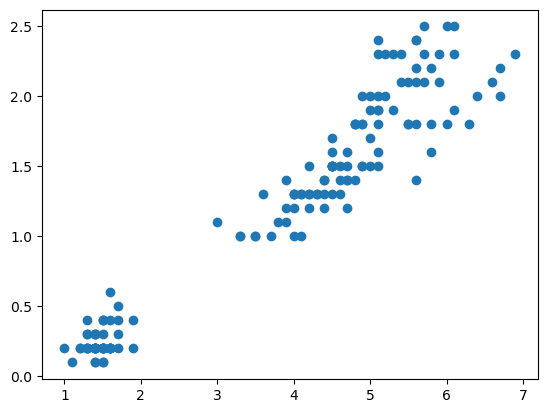

In [77]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [79]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [81]:
df['cluster']=yp
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


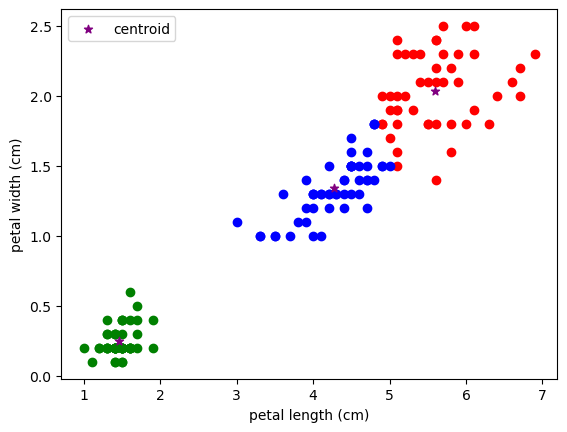

In [83]:
km.cluster_centers_##(x,y)
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
###[:,0]==[all row,1st column];;;[:,1]==[all row,2nd column]
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

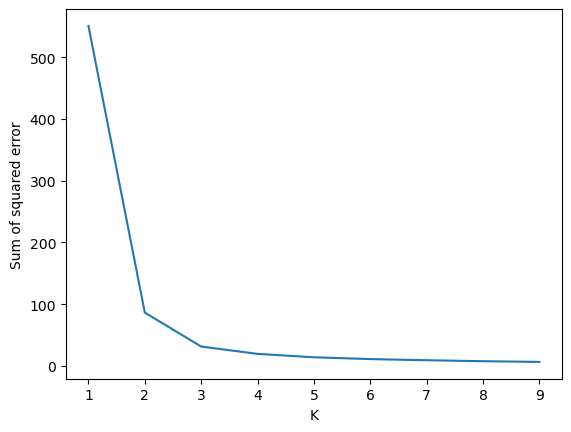

In [85]:
import os
import warnings
from sklearn.cluster import KMeans

# Suppress warnings for clean output
warnings.filterwarnings("ignore")

# Set the environment variable to avoid the memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

k_rng = range(1, 10)  # 1 to 9
sse = []  # Sum of square error

for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10)  # Explicitly set n_init to suppress FutureWarning
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)